<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/Projeto_Market_Place-Linguagem_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketplace - Minerando Dados para Regras de Associação

---
<b>Objetivo:</b>

Supondo que o supermercado deseja saber como maximizar as vendas de seus produtos através estratégias de recomendação de produtos após o entendimento de padrões de vendas anteriores.

---

### Análise o dataset das vendas:

Obtenção da base de dados

In [ ]:
library(arules)
data(Groceries)

Analisando as primeiras linhas da base de dados:

In [ ]:
inspect(Groceries[1:3])

    items                
[1] {citrus fruit,       
     semi-finished bread,
     margarine,          
     ready soups}        
[2] {tropical fruit,     
     yogurt,             
     coffee}             
[3] {whole milk}         


<b>Interpretação:</b>

- Cliente 1 comprou os itens: citrus fruit, semi-finished bread, margarine, ready soups;
- Cliente 2 comprou os itens: tropical fruit, yogurt, coffee;
- Cliente 3 comprou os itens: whole milk;
- ...

### Descritivo de algumas informações

In [ ]:
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

<b>Interpretação:</b>

- Temos um dataset com 9835 linhas e 169 colunas. Ou seja, 9835 compras de clientes e 169 produtos diferentes;
- Item mais frequente é leite integral (whole milk);
- Como é de se esperar, na distribuição de frequências das compras, quanto menos itens são comprados, maior é a frequênquência de itens comprados;
- Quantidade mínima de itens comprados é 1 e a máxima é 32. A média de itens comprados está entre 4-5, dentre otras medidas descritivas.

<b>Visualizando a frequência, de forma gráfica, dos 10 itens mais relevantes:

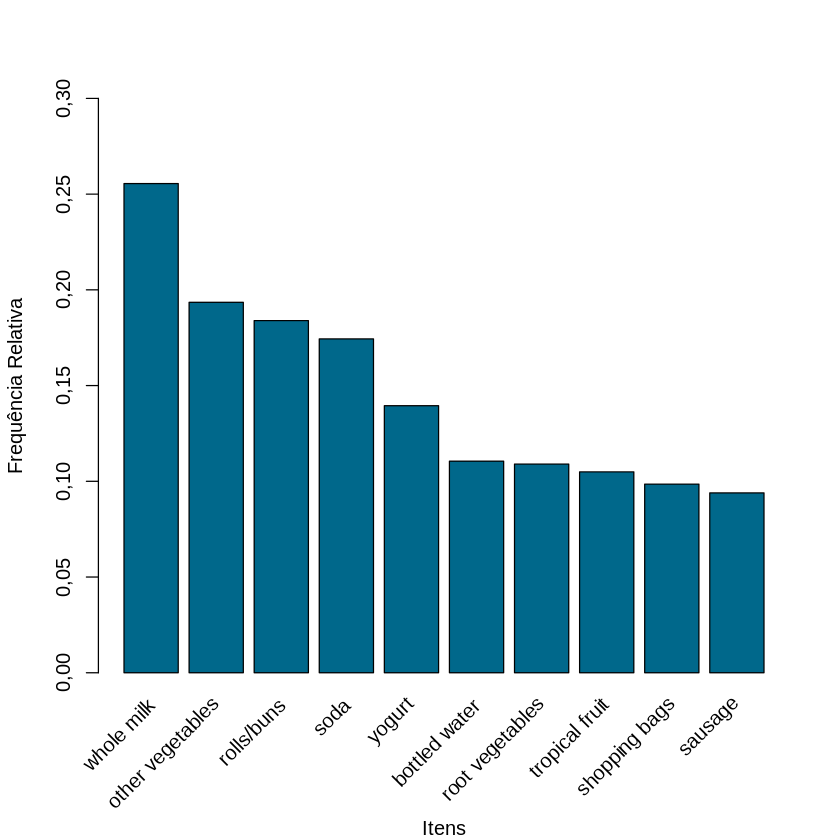

In [ ]:
itemFrequencyPlot(Groceries, topN=10, col="deepskyblue4", xlab = "Itens", 
                  ylab="Frequência Relativa", ylim=c(0,0.3),)

### Utilizando a função apriori para criarmos as regras

Entendendo o <b>suporte</b> como a frequência com que os itens ocorrem juntos no mesmo conjunto de dados e <b>confiança</b> como a probabilidade de encontrar o suporte de um determinado item considerado a priori no conjunto, temos:

In [ ]:
rules <- apriori(Groceries, parameter = list(supp=0.0015, conf=0.7))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,7    0,1    1 none FALSE            TRUE       5  0,0015      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0,00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0,01s].
sorting and recoding items ... [153 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 4 5 6 done [0,01s].
writing ... [300 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].


In [ ]:
summary(rules)

set of 300 rules

rule length distribution (lhs + rhs):sizes
  3   4   5 
 53 201  46 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3,000   4,000   4,000   3,977   4,000   5,000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0,001525   Min.   :0,7000   Min.   :0,001627   Min.   : 2,740  
 1st Qu.:0,001525   1st Qu.:0,7143   1st Qu.:0,002135   1st Qu.: 2,860  
 Median :0,001729   Median :0,7500   Median :0,002339   Median : 3,063  
 Mean   :0,001960   Mean   :0,7623   Mean   :0,002592   Mean   : 3,356  
 3rd Qu.:0,002135   3rd Qu.:0,7895   3rd Qu.:0,002847   3rd Qu.: 3,747  
 Max.   :0,005694   Max.   :1,0000   Max.   :0,008134   Max.   :11,235  
     count      
 Min.   :15,00  
 1st Qu.:15,00  
 Median :17,00  
 Mean   :19,28  
 3rd Qu.:21,00  
 Max.   :56,00  

mining info:
      data ntransactions support confidence
 Groceries          9835  0,0015        0,7

<b>Interpretação:</b>

- Utilizando um suporte de 0.0015 e uma confiança de 0.70, encontramos 300 regras.

#### Regras:

In [ ]:
rule_1 <- apriori(Groceries, parameter = list(supp=0.002, conf=0.7, minlen=2, maxlen=4))

summary(rule_1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,7    0,1    1 none FALSE            TRUE       5   0,002      2
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0,00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0,00s].
sorting and recoding items ... [147 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 4

Warning message in apriori(Groceries, parameter = list(supp = 0,002, conf = 0,7, :
“Mining stopped (maxlen reached). Only patterns up to a length of 4 returned!”

 done [0,01s].
writing ... [81 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].


set of 81 rules

rule length distribution (lhs + rhs):sizes
 3  4 
22 59 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3,000   3,000   4,000   3,728   4,000   4,000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0,002034   Min.   :0,7000   Min.   :0,002542   Min.   :2,740  
 1st Qu.:0,002135   1st Qu.:0,7143   1st Qu.:0,002847   1st Qu.:2,813  
 Median :0,002440   Median :0,7333   Median :0,003152   Median :2,935  
 Mean   :0,002627   Mean   :0,7418   Mean   :0,003554   Mean   :3,133  
 3rd Qu.:0,002745   3rd Qu.:0,7667   3rd Qu.:0,003660   3rd Qu.:3,312  
 Max.   :0,005694   Max.   :0,8462   Max.   :0,008134   Max.   :4,135  
     count      
 Min.   :20,00  
 1st Qu.:21,00  
 Median :24,00  
 Mean   :25,84  
 3rd Qu.:27,00  
 Max.   :56,00  

mining info:
      data ntransactions support confidence
 Groceries          9835   0,002        0,7

<b><font color=red>Lift</b>: Representa a relevância de um item (aparecer), dado que já apareceu um outro a priori.

In [ ]:
inspect(sort(rule_1[1:20], by="lift"))

     lhs                                   rhs                support    
[1]  {whipped/sour cream,soft cheese}   => {other vegetables} 0,002236909
[2]  {root vegetables,soft cheese}      => {other vegetables} 0,002440264
[3]  {citrus fruit,herbs}               => {other vegetables} 0,002135231
[4]  {root vegetables,baking powder}    => {other vegetables} 0,002541942
[5]  {root vegetables,rice}             => {other vegetables} 0,002236909
[6]  {tropical fruit,herbs}             => {whole milk}       0,002338587
[7]  {hamburger meat,curd}              => {whole milk}       0,002541942
[8]  {herbs,rolls/buns}                 => {whole milk}       0,002440264
[9]  {root vegetables,rice}             => {whole milk}       0,002440264
[10] {butter milk,whipped/sour cream}   => {whole milk}       0,002948653
[11] {onions,butter}                    => {whole milk}       0,003050330
[12] {butter,soft cheese}               => {whole milk}       0,002033554
[13] {cream cheese ,sugar}            

In [ ]:
inspect(sort(rule_1[1:10], decreasing=TRUE, by="lift"))

     lhs                                 rhs                support    
[1]  {whipped/sour cream,soft cheese} => {other vegetables} 0,002236909
[2]  {citrus fruit,herbs}             => {other vegetables} 0,002135231
[3]  {root vegetables,baking powder}  => {other vegetables} 0,002541942
[4]  {root vegetables,rice}           => {other vegetables} 0,002236909
[5]  {tropical fruit,herbs}           => {whole milk}       0,002338587
[6]  {herbs,rolls/buns}               => {whole milk}       0,002440264
[7]  {root vegetables,rice}           => {whole milk}       0,002440264
[8]  {butter,soft cheese}             => {whole milk}       0,002033554
[9]  {yogurt,specialty cheese}        => {whole milk}       0,002033554
[10] {yogurt,baking powder}           => {whole milk}       0,003253686
     confidence coverage    lift     count
[1]  0,7333333  0,003050330 3,789981 22   
[2]  0,7241379  0,002948653 3,742457 21   
[3]  0,7142857  0,003558719 3,691540 25   
[4]  0,7096774  0,003152008 3,667723

<b>Interpretação:</b>

- Com esses novos parâmetros, temos 81 regras;
- É possível perceber que os elementos "other vegetables" e "whole milk" são bem comuns de saírem. Saem com "tudo", basicamente.
- Ainda assim, é possível obsrvar alguns padrões.

### Analisando um subconjunto para yogurt:

<b>Utilizando da regra anteriormente estabelecida, com um suporte de 0.002 e uma confiança de 0.70

In [ ]:
regra_yogurt <- subset(rule_1, items %in% "yogurt")

inspect(regra_yogurt[1:5])

    lhs                   rhs                    support confidence    coverage     lift count
[1] {yogurt,                                                                                  
     specialty cheese} => {whole milk}       0,002033554  0,7142857 0,002846975 2,795464    20
[2] {yogurt,                                                                                  
     baking powder}    => {whole milk}       0,003253686  0,7111111 0,004575496 2,783039    32
[3] {other vegetables,                                                                        
     yogurt,                                                                                  
     hard cheese}      => {whole milk}       0,002033554  0,7142857 0,002846975 2,795464    20
[4] {whole milk,                                                                              
     yogurt,                                                                                  
     oil}              => {other vegetables} 0,002

<b>Segmentação 1</b>: O que os clientes compram antes de comprar yogurt?

In [ ]:
rule_yogurt_1 <- apriori(Groceries, parameter=list(supp=0.002, conf=0.55), 
                       appearance=list(default="lhs", rhs="yogurt"))

inspect(sort(rule_yogurt_1, by="lift"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0,55    0,1    1 none FALSE            TRUE       5   0,002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[1 item(s)] done [0,00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0,01s].
sorting and recoding items ... [147 item(s)] done [0,00s].
creating transaction tree ... done [0,01s].
checking subsets of size 1 2 3 4 5 done [0,01s].
writing ... [13 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].
     lhs                     rhs          support confidence    coverage     lift count
[1]  {tropical fruit,                                                                  
      other vegetables,                                                                
      whole milk,   

<b>Segmentação 2</b>: O que os clientes compram depois de comprar yogurt?

In [ ]:
rule_yogurt_2 <- apriori(Groceries, parameter=list(supp=0.002, conf=0.2), 
                       appearance=list(default="rhs", lhs="yogurt"))

inspect(sort(rule_yogurt_2, by="lift"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,2    0,1    1 none FALSE            TRUE       5   0,002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[1 item(s)] done [0,00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0,01s].
sorting and recoding items ... [147 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 done [0,00s].
writing ... [5 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].
    lhs         rhs                support    confidence coverage  lift    
[1] {yogurt} => {tropical fruit}   0,02928317 0,2099125  0,1395018 2,000475
[2] {yogurt} => {other vegetables} 0,04341637 0,3112245  0,1395018 1,608457
[3] {yogurt} => {whole milk}       0,05602440 0,4016035  0,1395

<b>Interpretação:</b>

- Com esses novos parâmetros, temos 13 regras para produtos que são comprados antes de comprar yogurt e 4/5 regras após a compra de yogurtes;
- Ouseja, há muito mais itens relacionados as compras de yogurtes com compras anteriores de produtos do que o contrário;
- Temos altas relevâncias para os itens das regras (lift alto), com uma confiança também considerada alta;
- Claro que, se diminuirmos o suporte e também a confiança, o número de regras aumentaria, o que possibilitaria ver muito mais transações;
- Para que a análise fique com uma maior compreensão, farei um gráfico abaixo.

### Visualizando as regras para o yogurt, com o suporte de 0.002 e confiança de 0.6

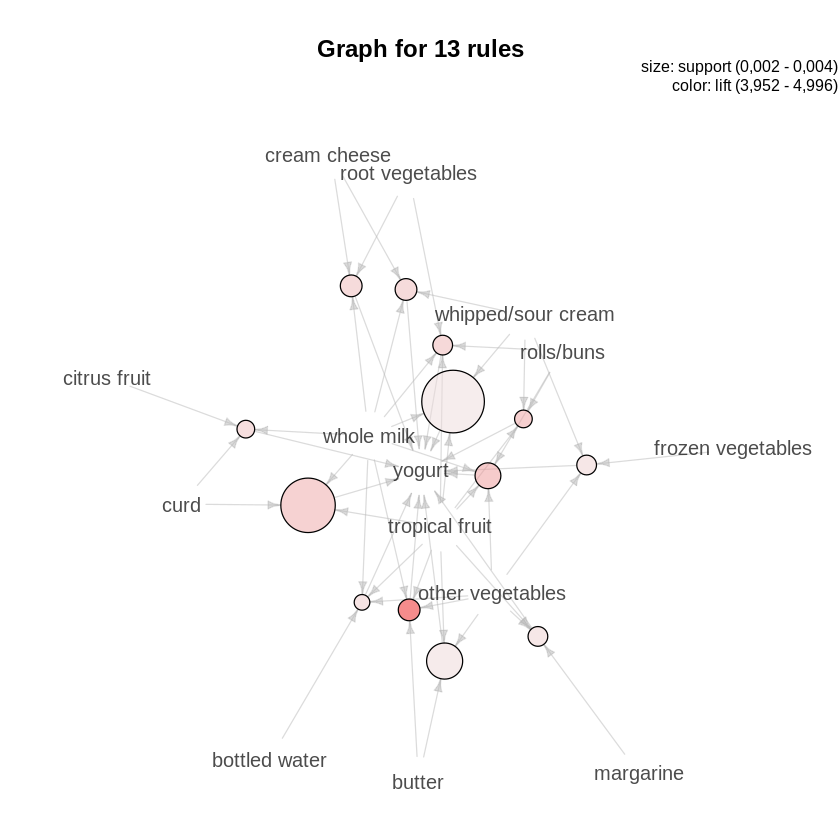

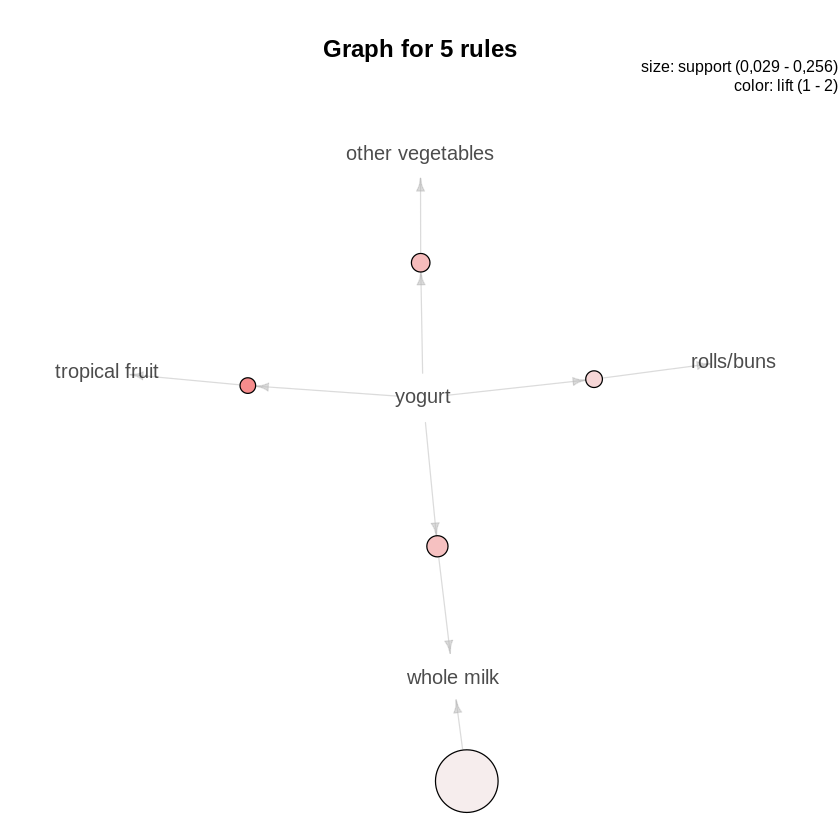

In [ ]:
library(arulesViz)

plot(rule_yogurt_1, method="graph")

plot(rule_yogurt_2, method="graph")

<b>Interpretação:</b>

- O tamanho das bolhas representa o supote;
- A cor representa os maiores lifts.